In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path_1 = 'minors_batting_advanced.csv'
file_path_2 = 'minors_batting_profile.csv'
file_path_3 = 'minors_batting_standard.csv'

mbatting1 = pd.read_csv(file_path_1)
mbatting2 = pd.read_csv(file_path_2)
mbatting3 = pd.read_csv(file_path_3)

mbatting4 = pd.merge(mbatting3, mbatting2.drop(columns = ['Name', 'Age', 'PA']), on=['PlayerId', 'Season', 'Team', 'Level'], how='inner')
mbatting = pd.merge(mbatting4, mbatting1.drop(columns = ['Name', 'Age', 'BABIP', 'PA', 'AVG']), on=['PlayerId', 'Season', 'Team', 'Level'], how='inner')

mbatting = mbatting[~((mbatting['PA'] == 0) | (mbatting['PA'].isna()))]
mbatting.loc[mbatting['H'] == 0, ['Pull%', 'Cent%', 'Oppo%']] = 0
mbatting = mbatting.dropna(subset=['Name', 'Team','Age', 'Pitches','Pull%'])
print(mbatting.columns)

Index(['Season', 'Name', 'Team', 'Level', 'Age', 'G', 'AB', 'PA', 'H', '1B',
       '2B', '3B', 'HR', 'R', 'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH',
       'GDP', 'SB', 'CS', 'AVG', 'PlayerId', 'BABIP', 'GB/FB', 'LD%', 'GB%',
       'FB%', 'IFFB%', 'HR/FB', 'Pull%', 'Cent%', 'Oppo%', 'SwStr%', 'Balls',
       'Strikes', 'Pitches', 'BB%', 'K%', 'BB/K', 'OBP', 'SLG', 'OPS', 'ISO',
       'Spd', 'wSB', 'wRC', 'wRAA', 'wOBA', 'wRC+'],
      dtype='object')


In [ ]:
# na_counts = mbatting.isna().sum()
# print(na_counts[na_counts > 0])

In [ ]:
# mbatting.to_csv('batting.csv', index=False)

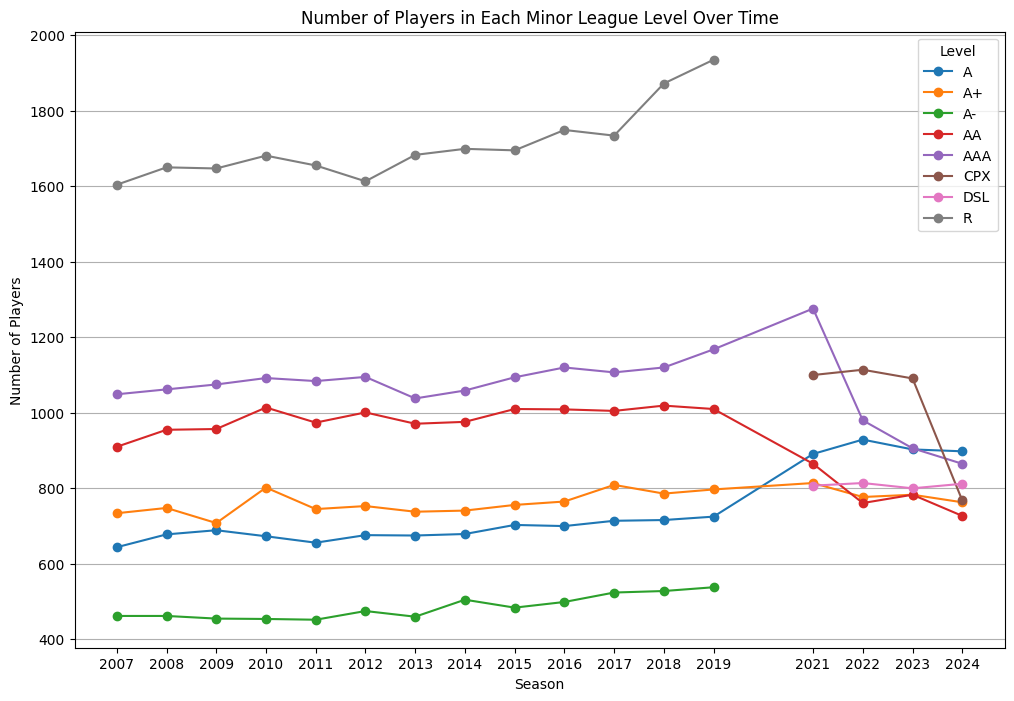

In [ ]:
player_counts = mbatting.groupby(['Season', 'Level'])['PlayerId'].nunique().unstack('Level')

# Plot the counts using a line plot
plt.figure(figsize=(12, 8))
for level in player_counts.columns:
    plt.plot(player_counts.index, player_counts[level], marker='o', label=level)

# Force integer ticks on the x-axis
plt.xticks(player_counts.index, [str(int(x)) for x in player_counts.index])

plt.xlabel("Season")
plt.ylabel("Number of Players")
plt.title("Number of Players in Each Minor League Level Over Time")
plt.legend(title='Level')
plt.grid(axis="y")
plt.show()

<ipython-input-6-f86048728337>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ewoba_level = mbatting.groupby('Level').apply(


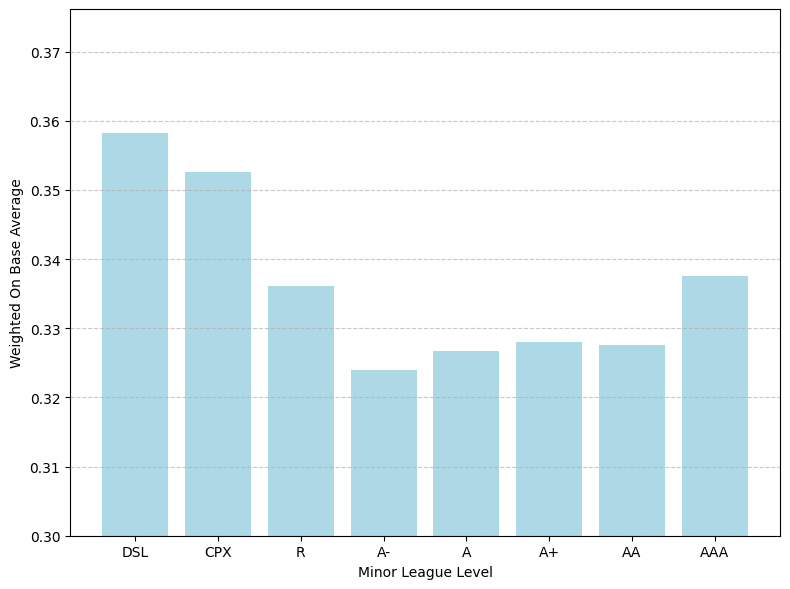

In [ ]:
# ewoba_level = mbatting.groupby('Level').apply(
#     lambda g: (g['wOBA'] * g['PA']).sum() / g['PA'].sum()
# ).reset_index(name='exp_wOBA')

# # Plot a bar chart for the average expected wOBA by minor league level
# plt.figure(figsize=(8, 6))
# plt.bar(ewoba_level['Level'], ewoba_level['exp_wOBA'], color='lightblue')
# plt.xlabel("Minor League Level")
# plt.ylabel("Weighted On Base Average")
# plt.title("Average wOBA by Minor League Level (All Seasons)")
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Set the y-axis lower limit to 0.3
# plt.ylim(bottom=0.3)

# plt.tight_layout()
# plt.show()



ewoba_level = mbatting.groupby('Level').apply(
    lambda g: (g['wOBA'] * g['PA']).sum() / g['PA'].sum()
).reset_index(name='exp_wOBA')

# Define the custom order for the minor league hierarchy.
order = ["DSL", "CPX","R","A-", "A", "A+", "AA", "AAA"]

# Reorder the DataFrame using .set_index() and .loc[]
ewoba_level = ewoba_level.set_index('Level').loc[order].reset_index()

# Plot a bar chart for the average expected wOBA by minor league level
plt.figure(figsize=(8, 6))
plt.bar(ewoba_level['Level'], ewoba_level['exp_wOBA'], color='lightblue')
plt.xlabel("Minor League Level")
plt.ylabel("Weighted On Base Average")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the y-axis lower limit to 0.3
plt.ylim(bottom=0.3)

plt.tight_layout()
plt.show()

<ipython-input-7-7ef89a53202e>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ewrc_level = mbatting.groupby('Level').apply(


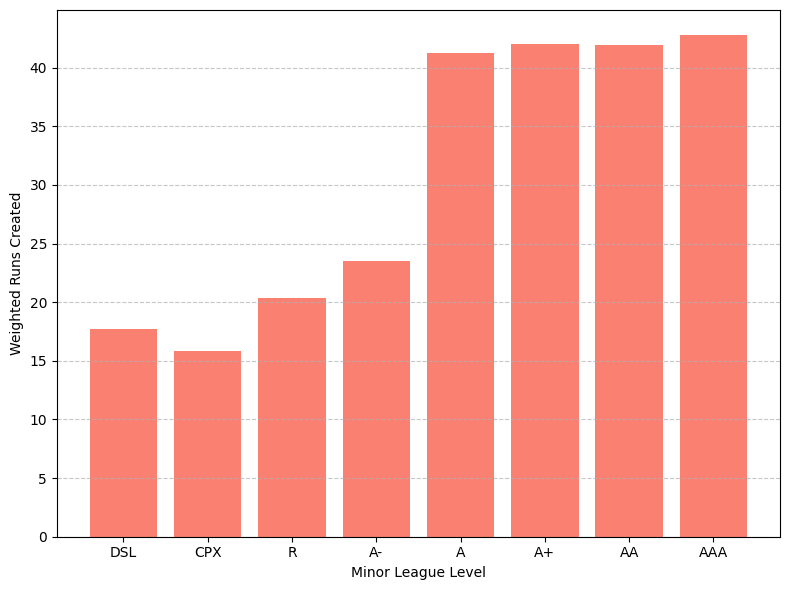

In [ ]:
ewrc_level = mbatting.groupby('Level').apply(
    lambda g: (g['wRC'] * g['PA']).sum() / g['PA'].sum()
).reset_index(name='exp_wRC')

# Define the custom order for the minor league hierarchy.
order = ["DSL", "CPX","R","A-", "A", "A+", "AA", "AAA"]

# Reorder the DataFrame using .set_index() and .loc[]
ewrc_level = ewrc_level.set_index('Level').loc[order].reset_index()

# Plot a bar chart for the average wRC+ by minor league level
plt.figure(figsize=(8, 6))
plt.bar(ewrc_level['Level'], ewrc_level['exp_wRC'], color='salmon')
plt.xlabel("Minor League Level")
plt.ylabel("Weighted Runs Created")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-8-e5cf87039712>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ewraa_level = mbatting.groupby('Level').apply(


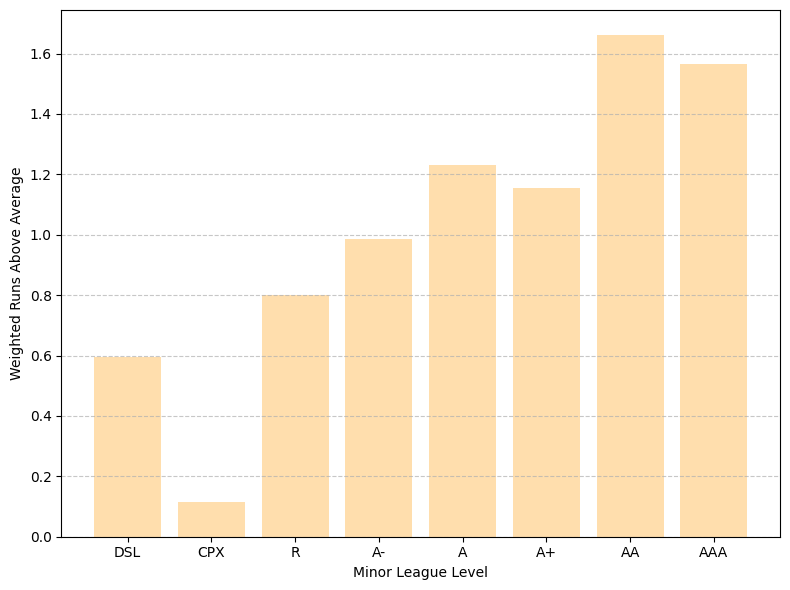

In [ ]:
ewraa_level = mbatting.groupby('Level').apply(
    lambda g: (g['wRAA'] * g['PA']).sum() / g['PA'].sum()
).reset_index(name='exp_wRAA')

# Define the custom order for the minor league hierarchy.
order = ["DSL", "CPX","R","A-", "A", "A+", "AA", "AAA"]

# Reorder the DataFrame using .set_index() and .loc[]
ewraa_level = ewraa_level.set_index('Level').loc[order].reset_index()

# Plot a bar chart for the average wRC+ by minor league level
plt.figure(figsize=(8, 6))
plt.bar(ewraa_level['Level'], ewraa_level['exp_wRAA'], color='navajowhite')
plt.xlabel("Minor League Level")
plt.ylabel("Weighted Runs Above Average")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()